M.Naveen Kumar
AIE-23168


# Lab Assignment 1: Introduction to Speech Processing

**Dataset Description :**
The LJ Speech Dataset is a publicly available single-speaker English speech corpus recorded by a female speaker. It contains 13,100 short audio clips with durations ranging from 1 to 10 seconds, totaling nearly 24 hours of speech. All audio files are provided in single-channel, 16-bit PCM WAV format with a sampling rate of 22,050 Hz. Each clip is accompanied by an accurate text transcription and a normalized transcription stored in a metadata file. The spoken content is derived from seven public-domain non-fiction books published between 1884 and 1964. The recordings were produced by the LibriVox project and segmented automatically based on silence, followed by manual text–audio alignment. Due to its clean recordings, consistent annotations, and public-domain license, the dataset is widely used for speech processing and text-to-speech research.

**Objective1**: Record their own voice using a microphone, save as .wav. Play back and listen.
What is the sampling rate and bit depth

In [ ]:
from pydub import AudioSegment
import soundfile as sf
import librosa
from IPython.display import Audio, display
import numpy as np

# File paths
m4a_file = "/content/Recording (9).m4a"   # your m4a file
wav_file = "output_audio.wav"

# -------------------------------
# 1. Convert M4A to WAV
# -------------------------------
audio = AudioSegment.from_file(m4a_file, format="m4a")
audio.export(wav_file, format="wav")

print("Conversion completed: M4A → WAV")

# -------------------------------
# 2. Play the WAV audio
# -------------------------------
y, sr = librosa.load(wav_file, sr=None)

print("\nPlaying converted WAV file:")
display(Audio(data=y, rate=sr))

# -------------------------------
# 3. Get Sampling Rate & Bit Depth
# -------------------------------
info = sf.info(wav_file)

print("\nAudio Properties:")
print("Sampling Rate:", info.samplerate, "Hz")
print("Bit Depth:", info.subtype)


Conversion completed: M4A → WAV

Playing converted WAV file:



Audio Properties:
Sampling Rate: 48000 Hz
Bit Depth: PCM_16


**Objective2**: Introduction to basic operations on speech signals. Perform the following tasks:
1. Import and read a speech file. You can download The LJ Speech Dataset  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import numpy as np

In [ ]:
def analyze_signal(file_path):

    y, sample_rate = librosa.load(file_path, sr=None)

    n_samples = len(y)
    total_duration = n_samples / sample_rate

    print("Sample rate:", sample_rate)
    print("Total number of samples:", n_samples)
    print("Total duration of the signal:", total_duration)


In [ ]:
def plot_signal(file_path):

    y, sample_rate = librosa.load(file_path, sr=None)

    n_samples = len(y)
    total_duration = n_samples / sample_rate

    frame_length = 1024
    hop_length = 512

    # Short-time energy
    energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]   # flatten

    threshold = np.mean(energy) * 0.1

    # Convert frames to time
    time_axis = librosa.frames_to_time(
        np.arange(len(energy)),
        sr=sample_rate,
        hop_length=hop_length
    )

    plt.figure(figsize=(12, 4))

    librosa.display.waveshow(y, sr=sample_rate, alpha=0.6, label="Waveform")
    plt.axhline(y=threshold, color='k', linestyle='--', label='Energy Threshold')

    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude / Energy")
    plt.title(f"Waveform of Speech Signal: {os.path.basename(file_path)}")
    plt.xlim(0, total_duration)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def slice_and_normalize(file_path):

  y,sr=librosa.load(file_path,sr=None)

  duration_sec=2
  samples_sec=int(duration_sec*sr)
  y_slice=y[:samples_sec]

  y_norm=y_slice/np.max(np.abs(y_slice))

  time=np.linspace(0,duration_sec,len(y_slice))

  plt.figure(figsize=(12,6))

  plt.subplot(2,1,1)
  plt.plot(time,y_slice)
  plt.title("Original signal")
  plt.xlabel("Time(s)")
  plt.ylabel("Amplitude")

  plt.subplot(2,1,2)
  plt.plot(time,y_norm)
  plt.title("NOrmalized signal")
  plt.xlabel("Time(s)")
  plt.ylabel("Amplitude")

  plt.tight_layout()
  plt.show()

Sample rate: 22050
Total number of samples: 167226
Total duration of the signal: 7.583945578231292


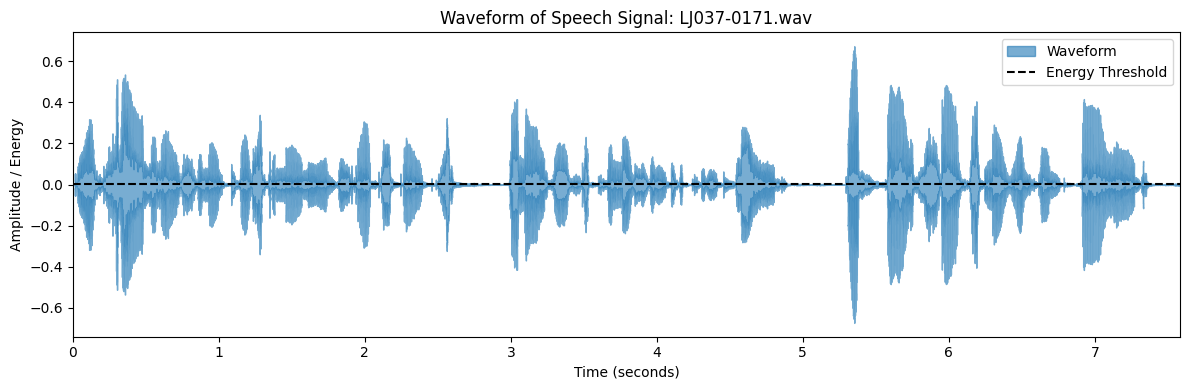

In [ ]:
file_path = "/content/LJ037-0171.wav"
analyze_signal(file_path)
plot_signal(file_path)

Sample rate: 22050
Total number of samples: 185146
Total duration of the signal: 8.396643990929705


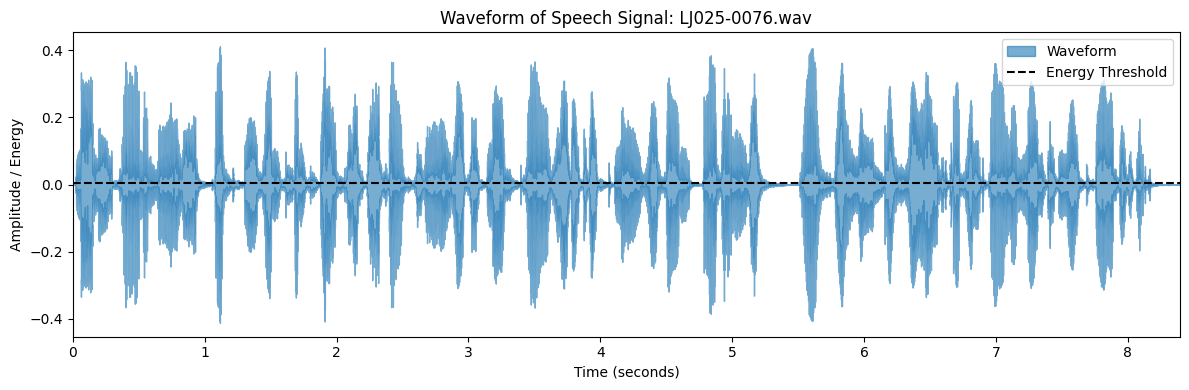

In [ ]:
file_path="/content/LJ025-0076.wav"
analyze_signal(file_path)
plot_signal(file_path)

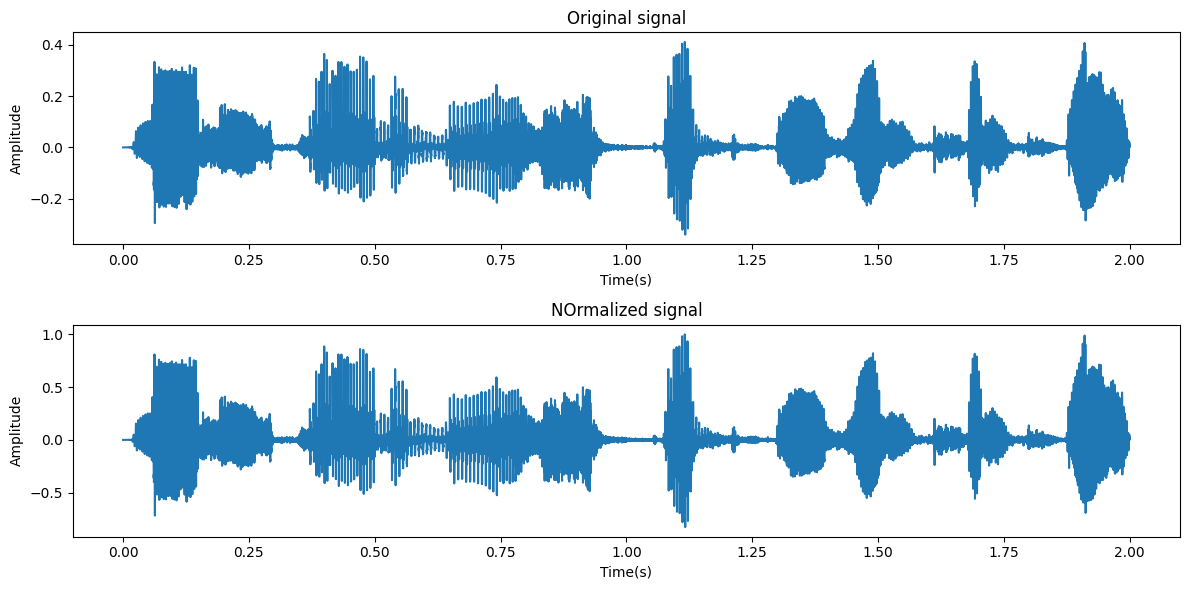

In [ ]:
file_path="/content/LJ025-0076.wav"
slice_and_normalize(file_path)

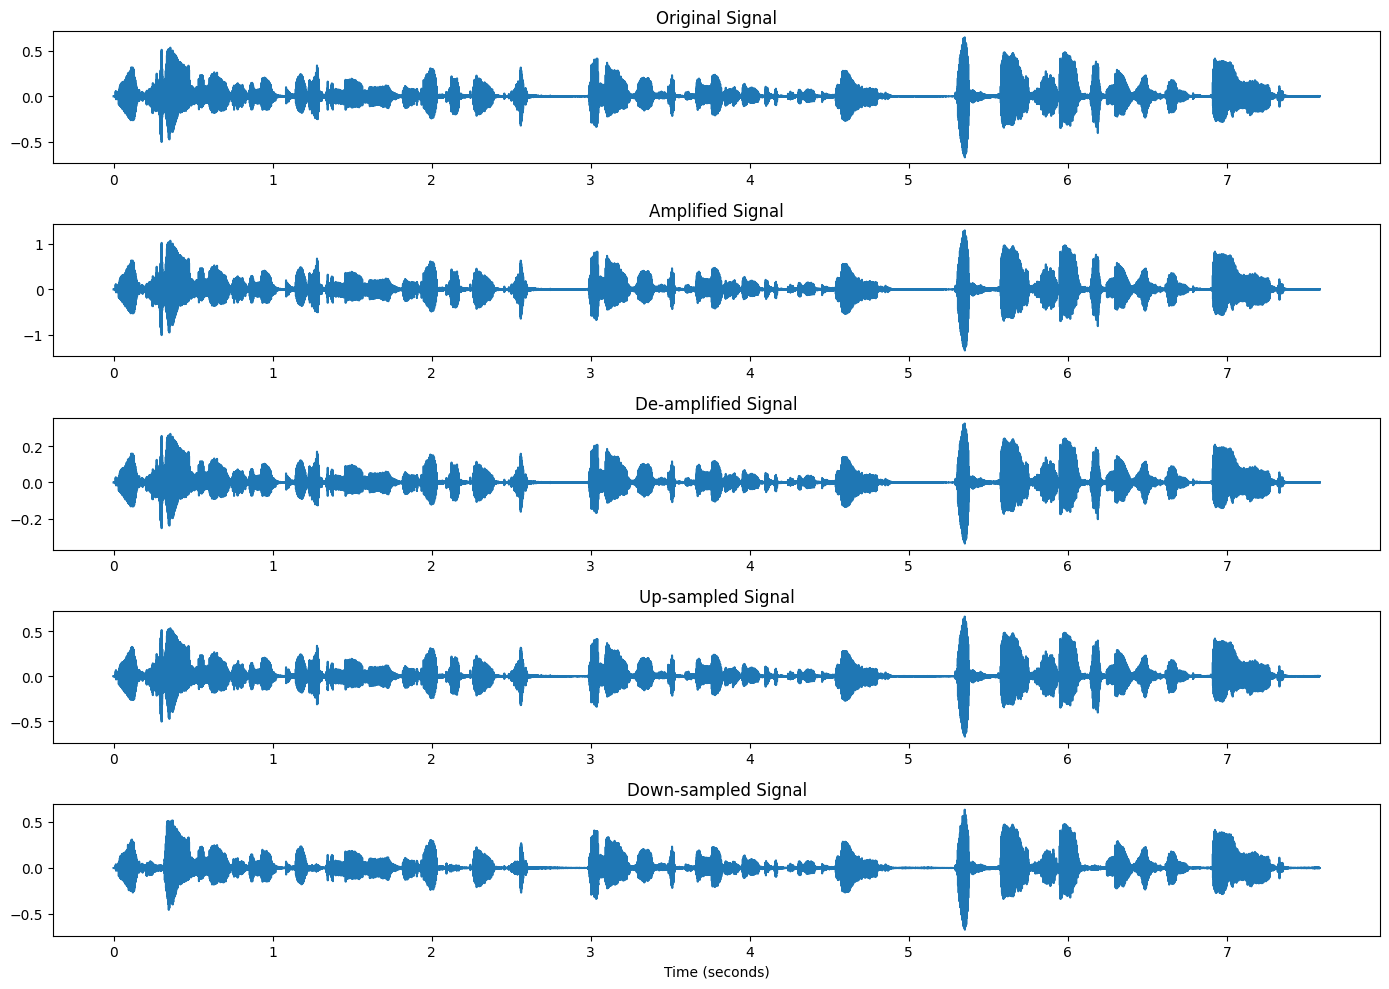

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


file_path = "/content/LJ037-0171.wav"
y, sr = librosa.load(file_path, sr=None)


t = np.linspace(0, len(y)/sr, len(y))


amp_factor = 2.0
y_amp = y * amp_factor


deamp_factor = 0.5
y_deamp = y * deamp_factor


up_sr = sr * 2
y_upsampled = librosa.resample(y, orig_sr=sr, target_sr=up_sr)
t_up = np.linspace(0, len(y_upsampled)/up_sr, len(y_upsampled))


down_sr = sr // 2
y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=down_sr)
t_down = np.linspace(0, len(y_downsampled)/down_sr, len(y_downsampled))


plt.figure(figsize=(14, 10))

plt.subplot(5, 1, 1)
plt.plot(t, y)
plt.title("Original Signal")

plt.subplot(5, 1, 2)
plt.plot(t, y_amp)
plt.title("Amplified Signal")

plt.subplot(5, 1, 3)
plt.plot(t, y_deamp)
plt.title("De-amplified Signal")

plt.subplot(5, 1, 4)
plt.plot(t_up, y_upsampled)
plt.title("Up-sampled Signal")

plt.subplot(5, 1, 5)
plt.plot(t_down, y_downsampled)
plt.title("Down-sampled Signal")

plt.xlabel("Time (seconds)")
plt.tight_layout()
plt.show()


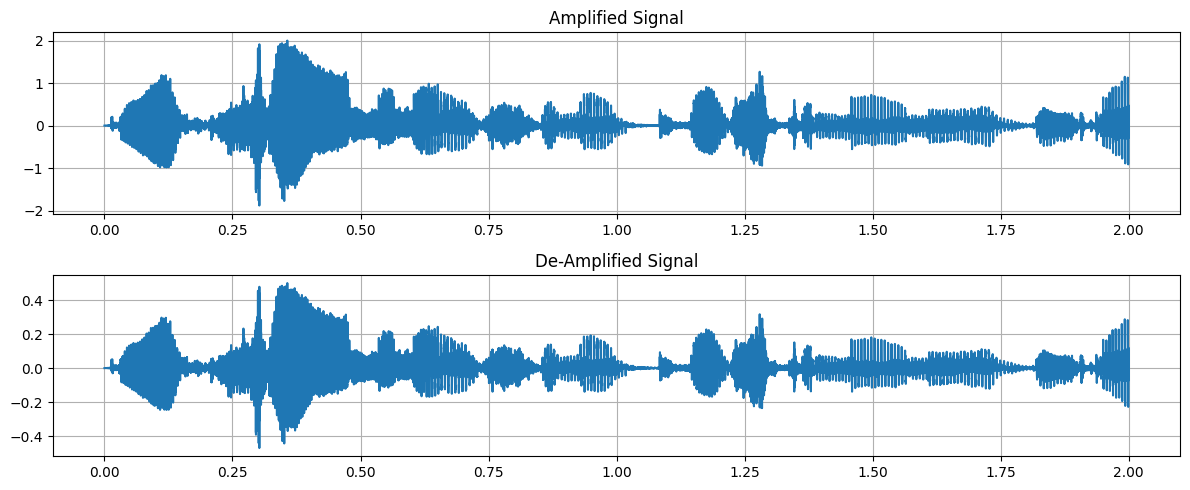

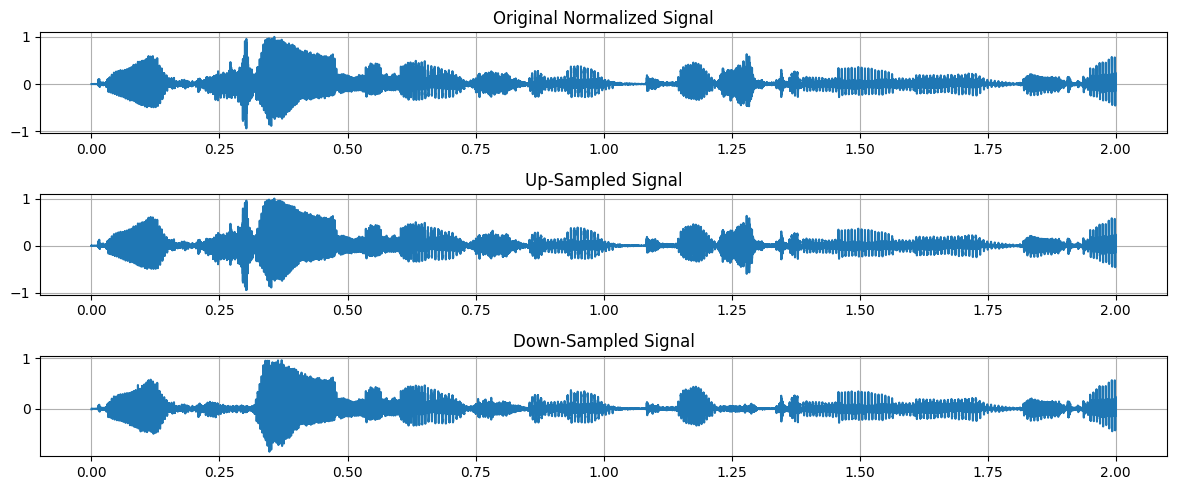

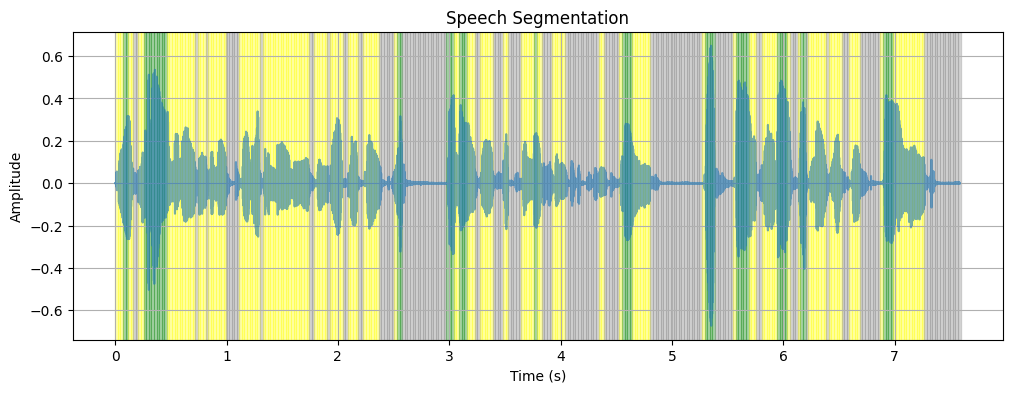

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

audio_path = "/content/LJ037-0171.wav"


signal, sr = librosa.load(audio_path, sr=None)

slice_duration = 2
slice_samples = int(slice_duration * sr)

sliced_signal = signal[:slice_samples]
slice_time = np.linspace(0, slice_duration, len(sliced_signal))

normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

amplified = 2 * normalized_signal
deamplified = 0.5 * normalized_signal

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(slice_time, amplified)
plt.title("Amplified Signal")
plt.grid()

plt.subplot(2,1,2)
plt.plot(slice_time, deamplified)
plt.title("De-Amplified Signal")
plt.grid()

plt.tight_layout()
plt.show()

upsampled = resample(normalized_signal, len(normalized_signal)*2)
up_time = np.linspace(0, slice_duration, len(upsampled))

downsampled = resample(normalized_signal, len(normalized_signal)//2)
down_time = np.linspace(0, slice_duration, len(downsampled))

plt.figure(figsize=(12,5))
plt.subplot(3,1,1)
plt.plot(slice_time, normalized_signal)
plt.title("Original Normalized Signal")
plt.grid()

plt.subplot(3,1,2)
plt.plot(up_time, upsampled)
plt.title("Up-Sampled Signal")
plt.grid()

plt.subplot(3,1,3)
plt.plot(down_time, downsampled)
plt.title("Down-Sampled Signal")
plt.grid()

plt.tight_layout()
plt.show()

frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(signal[i:i+frame_length]**2)
    for i in range(0, len(signal), hop_length)
])

energy = energy / np.max(energy)
time_frames = np.arange(len(energy)) * hop_length / sr

silence_thresh = 0.02
voiced_thresh = 0.2

labels = []
for e in energy:
    if e < silence_thresh:
        labels.append(0)
    elif e < voiced_thresh:
        labels.append(1)
    else:
        labels.append(2)

labels = np.array(labels)

time = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,4))
plt.plot(time, signal, alpha=0.6)

for i in range(len(labels)):
    if labels[i] == 0:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='gray', alpha=0.3)
    elif labels[i] == 1:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='yellow', alpha=0.3)
    else:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='green', alpha=0.3)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Speech Segmentation")
plt.grid()
plt.show()